### Importación de datos



In [25]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
# biblioteca de visualizacion de datos, interfaces de alto nivel para graficos estadisticos
import numpy as np
#fundamental para la computacion cientifica, estructuras de datos eficientes para almacenar y manipular datos numericos para funciones matematicas con arrays

tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'
#unificamos la informacion de cada tienda
tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])

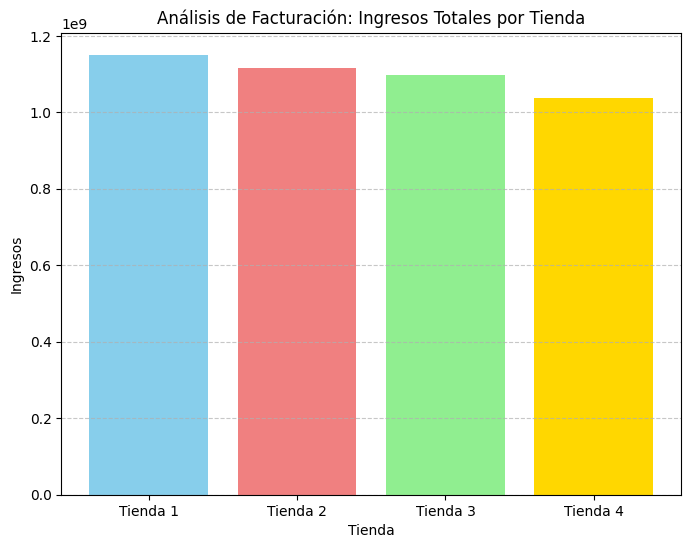

In [27]:
ingresos_por_tienda = tiendas.groupby('Tienda')['Precio'].sum()

plt.figure(figsize=(8, 6))
#damos las medidas con un tamaño especifico que queremos la grafica
plt.bar(ingresos_por_tienda.index, ingresos_por_tienda.values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Análisis de Facturación: Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Ventas por categoría

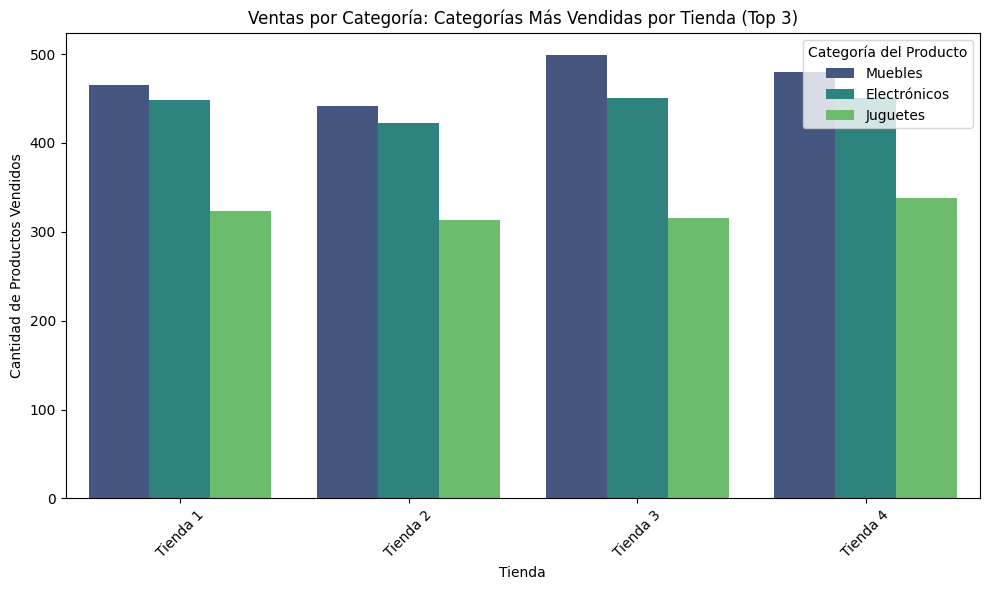

In [28]:
categorias_mas_vendidas = tiendas.groupby(['Tienda', 'Categoría del Producto'])['Producto'].count().reset_index()
#count cuenta la cantidad de  productos, contamos las veces que aparece un producto en cada tienda y su categoria
#reset_index  convierte los indices en columnas, facilita la manipulacion

mejores_categorias = categorias_mas_vendidas.sort_values(['Tienda', 'Producto'], ascending=[True, False]).groupby('Tienda').head(3)
#ascending=[True, False])  ordena las categorias mas vendidas, tienda en orden ascendente y producto en ordfen descendente
#groupby('Tienda').head(3) ordenamos  cada tienda con las 3 categorias de productos mas vendidos
plt.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='Producto', hue='Categoría del Producto', data=mejores_categorias, palette='viridis')
plt.title('Ventas por Categoría: Categorías Más Vendidas por Tienda (Top 3)')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de Productos Vendidos')
plt.xticks(rotation=45)
plt.legend(title='Categoría del Producto', loc='upper right')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


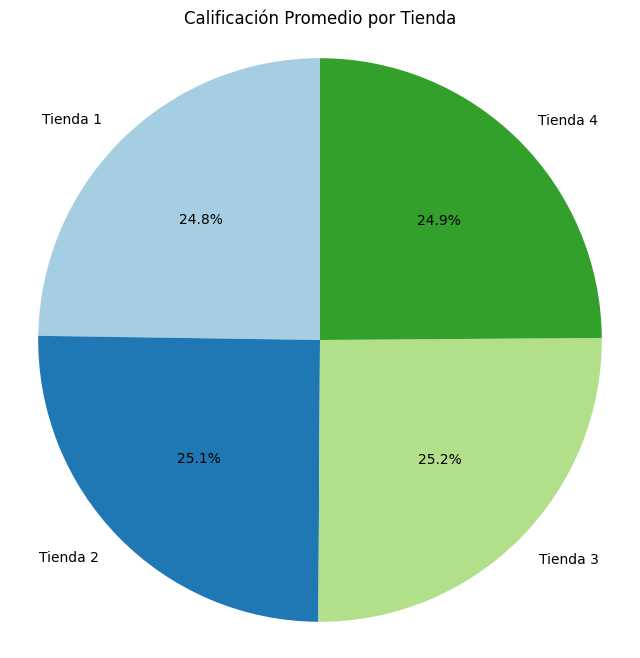

In [29]:
# Calcula la calificación promedio por tienda
calificacion_promedio = tiendas.groupby('Tienda')['Calificación'].mean()

# Crea el diagrama de sectores
plt.figure(figsize=(8, 8))
plt.pie(calificacion_promedio.values, labels=calificacion_promedio.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(np.arange(len(calificacion_promedio))))
plt.title('Calificación Promedio por Tienda')
plt.axis('equal')  # Para asegurar que el círculo sea un círculo
plt.show()

# 4. Productos más y menos vendidos

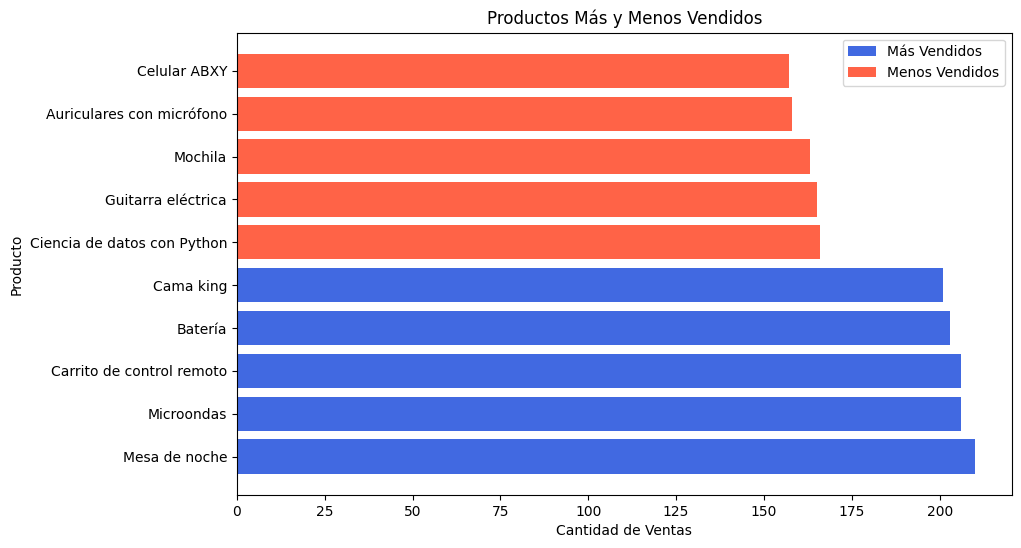

In [36]:
productos_vendidos = tiendas.groupby('Producto')['Producto'].count().sort_values(ascending=False)
#sort_values(ascending=False) ordenamos los productos de manera descendente

top_5_productos = productos_vendidos.head(5)
# corresponde a los 5 preductos mas vendidos
menos_vendidos_5_productos = productos_vendidos.tail(5)
# corresponde a los 5 preductos menos vendidos

plt.figure(figsize=(10, 6))
plt.barh(top_5_productos.index, top_5_productos.values, color='royalblue', label='Más Vendidos')
plt.barh(menos_vendidos_5_productos.index, menos_vendidos_5_productos.values, color='tomato', label='Menos Vendidos')
#barh grafico de barras
plt.title('Productos Más y Menos Vendidos')
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Producto')
plt.legend()
plt.show()


# 5. Envío promedio por tienda

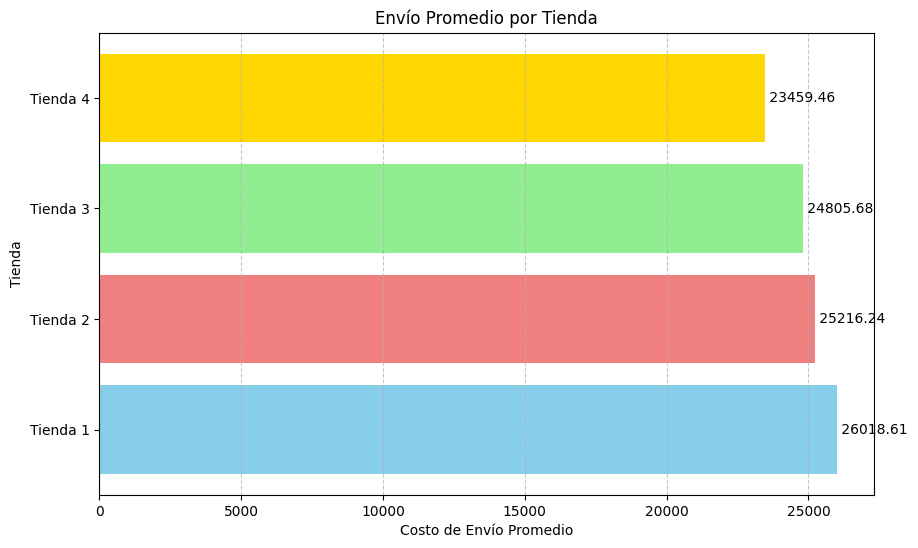

In [20]:
# Calcula el envío promedio por tienda
envio_promedio = tiendas.groupby('Tienda')['Costo de envío'].mean()

# Crea el gráfico de barras horizontales
plt.figure(figsize=(10, 6))  # Ajusta el tamaño si es necesario
plt.barh(envio_promedio.index, envio_promedio.values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Envío Promedio por Tienda')
plt.xlabel('Costo de Envío Promedio')
plt.ylabel('Tienda')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Agregar el valor del costo de envío al lado de cada barra
for i, valor in enumerate(envio_promedio.values):
    plt.text(valor + 0.5, i, f' {valor:.2f}', va='center', color='black')

plt.show()